The notebook must include appropriate comments and must operate as follows:
1. Load the data file and explore the data, showing size, data descriptions,
data distributions with boxplot, and correlation between columns (2pt)
2. Comment the exploration of step 1 pointing out if there are predicting
columns having the absolute value of correlation with the target less
than 0.15  (2pt)
3. train test a multivariate linear regressor and show the Root Mean
Squared Error (2pt)
4. train test a multivariate linear regressor on the reduced dataset obtained
dropping the columns loosely correlated with the target, and show the
Root Mean Squared Error (2pt)
5. train and test on the reduced dataset a decision tree regressor, and show
the Root Mean Squared Error (2pt)
6. optimise the depth of the decision tree regressor of step 5 searching for
the minimum Root Mean Squared Error with cross-validation, and show
the best RMSE (3pt)
7. Comment the results (3pt)


# Exam - Regression

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

url = 'ml_python_labexam_2023_02_03.csv'
target = 'y'
train_size = 0.67
random_state = 42

## 1. Load the data file and explore the data, showing size, data descriptions, data distributions with boxplot, and correlation between columns (2pt)

In [16]:
df = pd.read_csv(url)
print('Data shape: {} Data size: {}\n'.format(df.shape, df.size))
df.head()

Data shape: (1000, 11) Data size: 11000



,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,y
0,-0.016771,-0.026036,-0.001474,0.104545,0.352163,0.023372,0.003706,0.004963,-0.007113,0.022166,3.288439
1,-0.011618,0.025699,-0.026818,0.053014,0.613195,-0.012447,0.029382,-0.006348,-0.036920,-0.016464,-2.333510
2,0.027478,0.009282,-0.020700,0.630085,0.612415,-0.004157,0.008240,0.019062,0.010821,-0.012983,2.259783
3,-0.003170,-0.001697,-0.028924,0.389900,0.000182,0.027526,0.012792,-0.021192,-0.011102,0.015352,2.939127
4,-0.039508,-0.009104,0.021215,0.951426,0.778600,0.018246,-0.000294,-0.012900,0.004178,0.014846,1.623948


In [17]:
df.describe()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,y
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.000127,0.000297,-0.000421,3.378287e-01,2.521912e-01,0.000364,-0.000191,0.000553,0.000130,0.000524,0.437747
std,0.023475,0.018878,0.019124,2.952473e-01,2.877240e-01,0.017402,0.019349,0.017783,0.018999,0.025391,2.407762
min,-0.074550,-0.055749,-0.063489,9.531015e-07,6.913766e-10,-0.054694,-0.058531,-0.054578,-0.062925,-0.073059,-6.609545
25%,-0.015763,-0.012357,-0.013722,6.778294e-02,1.552023e-02,-0.011251,-0.013393,-0.011797,-0.012001,-0.018202,-1.200759
50%,0.000446,0.000269,-0.000891,2.638645e-01,1.218160e-01,0.000675,-0.000333,0.000422,-0.000858,-0.000219,0.336424
75%,0.015529,0.013924,0.012571,5.712697e-01,4.295876e-01,0.012217,0.012797,0.012697,0.012722,0.018642,2.175038
max,0.079599,0.073114,0.052593,9.996939e-01,9.988956e-01,0.053673,0.051803,0.049480,0.061867,0.081461,7.915506


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X00     1000 non-null   float64
 1   X01     1000 non-null   float64
 2   X02     1000 non-null   float64
 3   X03     1000 non-null   float64
 4   X04     1000 non-null   float64
 5   X05     1000 non-null   float64
 6   X06     1000 non-null   float64
 7   X07     1000 non-null   float64
 8   X08     1000 non-null   float64
 9   X09     1000 non-null   float64
 10  y       1000 non-null   float64
dtypes: float64(11)
memory usage: 86.1 KB


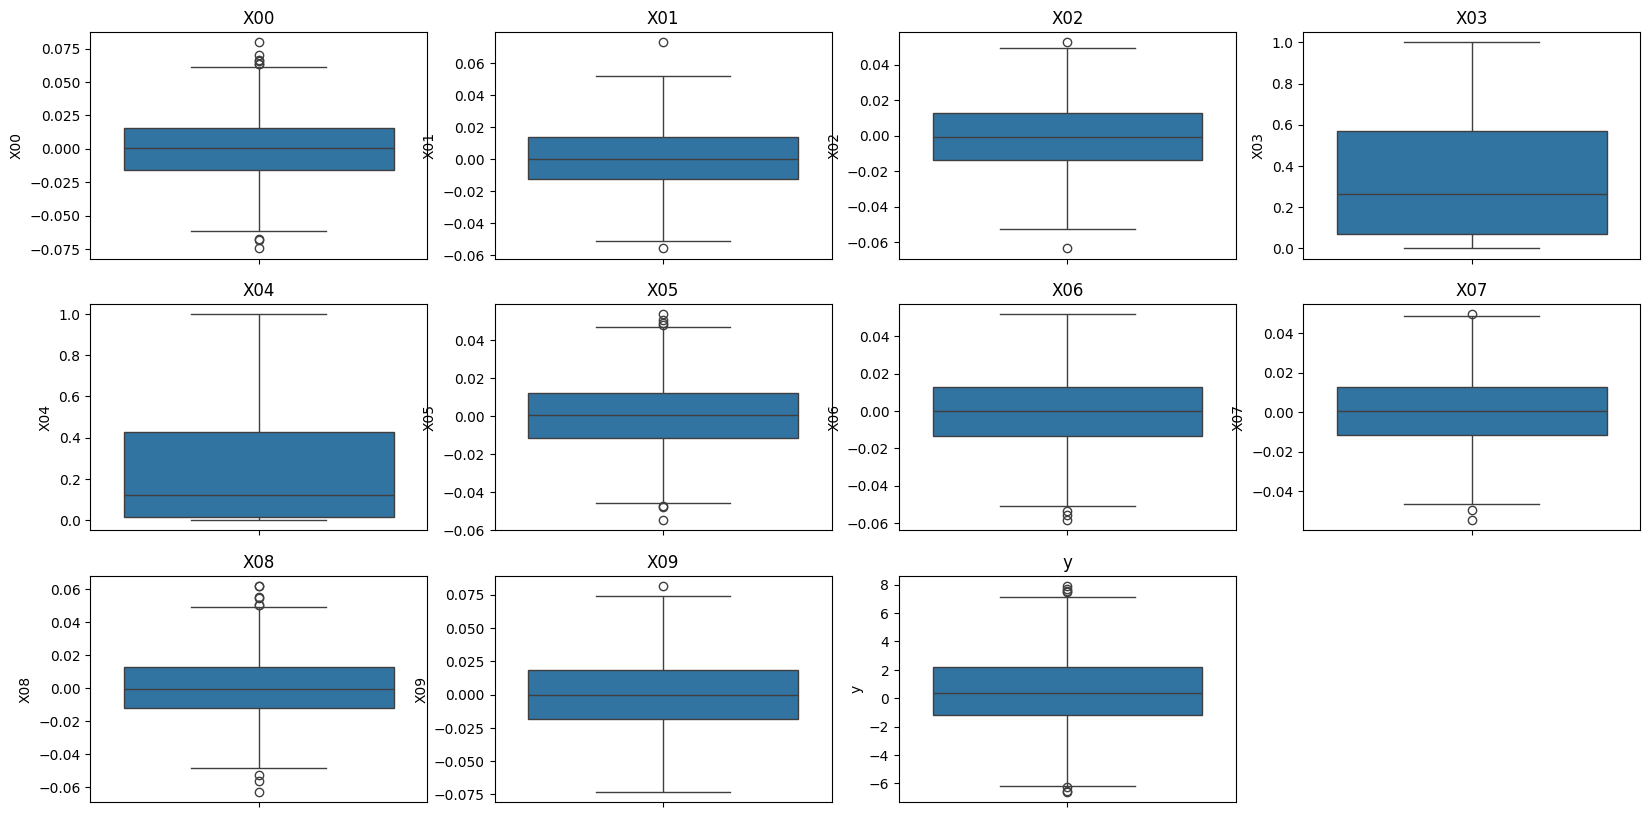

In [19]:
fig = plt.figure(figsize=(20,10))
pos = 1
for col in df.columns:
    plt.subplot(3, 4, pos)
    sns.boxplot(df[col])
    plt.title(col)
    pos += 1

<Axes: >

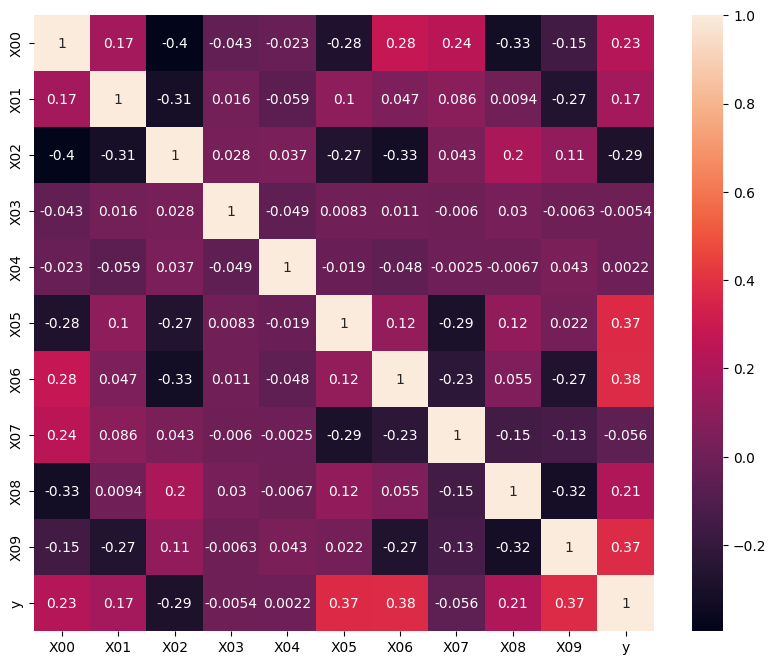

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

## 2. Comment the exploration of step 1 pointing out if there are predicting columns having the absolute value of correlation with the target less than 0.15  (2pt)


Lots of columns have some outliers, but the amount is reasonable. All variables have the average value around the middle, except 'X03' and 'X04', which are skewed with an average value closer to 0.


## 3. train test a multivariate linear regressor and show the Root Mean Squared Error (2pt)


In [21]:
from sklearn.metrics import mean_squared_error, r2_score

def calculate_rmse_r2(ytest, ypred):
    return mean_squared_error(ytest, ypred, squared=False), r2_score(ytest, ypred)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop(target, axis=1).copy()
y = df[target]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=random_state, train_size=train_size)

lr = LinearRegression()
lr.fit(Xtrain, ytrain)
y_lr = lr.predict(Xtest)

rmse , r2 = calculate_rmse_r2(ytest, y_lr)

print('Multivariate linear regressor -> RMSE: {:.2f} R2: {:.2f}'.format(rmse, r2))

Multivariate linear regressor -> RMSE: 0.87 R2: 0.86


## 4. train test a multivariate linear regressor on the reduced dataset obtained dropping the columns loosely correlated with the target, and show the Root Mean Squared Error (2pt)


Columns 'X03', 'X04' and 'X07' are loosely correlated with the target column 'y', having an absolute value of correlation with the target less than 0.15, therefore they will be removed.

In [23]:
df_red = df.drop(columns=['X03', 'X04', 'X07'], axis=1).dropna().copy()
print('New dataframe shape: {}'.format(df_red.shape))

New dataframe shape: (1000, 8)


In [24]:
X = df_red.drop(target, axis=1)
y = df_red[target]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=random_state, train_size=train_size)

lr = LinearRegression()
lr.fit(Xtrain, ytrain)
y_lr_red = lr.predict(Xtest)

rmse, r2 = calculate_rmse_r2(ytest, y_lr_red)
print('Multivariate Linear Regressor (reduced dataset) -> RMSE: {:.2f} R2: {:.2f}'.format(rmse, r2))

Multivariate Linear Regressor (reduced dataset) -> RMSE: 0.98 R2: 0.82


## 5. train and test on the reduced dataset a decision tree regressor, and show the Root Mean Squared Error (2pt)


In [25]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=random_state)
dt.fit(Xtrain, ytrain)
y_dt = dt.predict(Xtest)
prev_max_depth = dt.tree_.max_depth

rmse, r2 = calculate_rmse_r2(ytest, y_dt)
print('Decision Tree Regressor (reduced dataset) -> RMSE: {:.2f} R2: {:.2f} max_depth: {}'.format(rmse, r2, prev_max_depth))

Decision Tree Regressor (reduced dataset) -> RMSE: 2.13 R2: 0.17 max_depth: 18


## 6. optimise the depth of the decision tree regressor of step 5 searching for the minimum Root Mean Squared Error with cross-validation, and show the best RMSE (3pt)

In [26]:
from sklearn.model_selection import GridSearchCV    

dt_params = [{'max_depth' : list(np.arange(1, prev_max_depth+1)), 'random_state' : [random_state]}]

gs = GridSearchCV(estimator=DecisionTreeRegressor()
                  , param_grid=dt_params
                  , refit=True)
gs.fit(Xtrain, ytrain)
y_dt = gs.predict(Xtest)

rmse, r2 = calculate_rmse_r2(ytest, y_dt)
print('Optimized Decision Tree Regressor (reduced dataset) -> RMSE: {:.2f} R2: {:.2f} max_depth: {}'.format(rmse, r2, gs.best_estimator_.tree_.max_depth))

Optimized Decision Tree Regressor (reduced dataset) -> RMSE: 1.95 R2: 0.31 max_depth: 8


## 7. Comment the results (3pt)

All RMSE values obtained are acceptable because they are all lower than the SD of the target "y" (2.407762) obtained with the describe() function.

Decision tree RMSE (1.95) is worse than the Multivariate Linear regressor (0.98)

Cross validation was useful with Decision tree regressor (RMSE decreased from 2.13 to 1.95), also max depth was lowered from 18 to 8.

Cleaning the dataset increased slightly the RMSE on the Multivariate Linear regressor.